In [30]:
import numpy as np
import pandas as pd

In [31]:
df=pd.read_csv('E:\\working_DATA\\gold_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [32]:
X=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

<AxesSubplot:xlabel='SPX', ylabel='Density'>

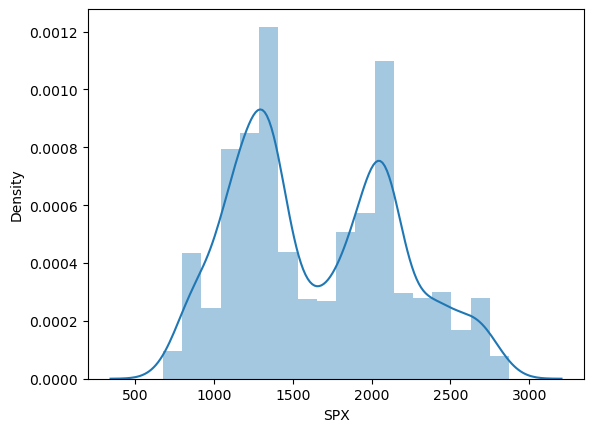

In [40]:
import seaborn as sns
sns.distplot(X['SPX'])

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EUR/USD', ylabel='Density'>

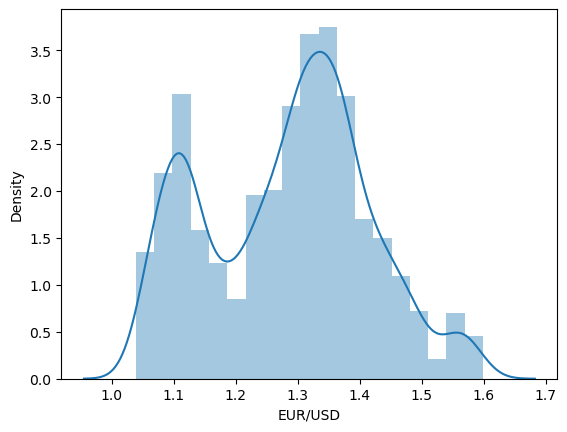

In [47]:
sns.distplot(X['EUR/USD'])

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler,Normalizer
nr=Normalizer()
X_train=nr.fit_transform(X_train)
X_test=nr.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
mse

array([-64.57761882, -47.11783538, -70.51196805, -63.68533885,
       -64.62416855, -67.54650126, -84.21063135, -75.63910717,
       -62.26545176, -64.06142784])

In [20]:
y_pred=lr.predict(X_test)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.8778627620470594